# Project Final Report (Group)


## Introduction

- provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
- clearly state the question you tried to answer with your project
- identify and fully describe the dataset that was used to answer the question

## Methods & Results

- describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
- your report should include code which:
    - loads data 
    - wrangles and cleans the data to the format necessary for the planned analysis
    - performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
    - creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
    - performs the data analysis
    - creates a visualization of the analysis 
note: all figures should have a figure number and a legend


Can the the player type, age and played hours of players predict if they are going to subscribe to a game-related newsletter and which player type is the most predictive?

In [1]:
#Loading required libraries
library(repr)
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
#Read csv file
player <- read_csv("data/players.csv")
slice_head(player, n=5)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21


In [3]:
#Wrangle unessccary data and re-assign data types
tidy_player <- player |> 
    select(-hashedEmail, -gender, -name) |>
    mutate(experience = as_factor(experience), subscribe = as_factor(subscribe)) |>
    mutate(subscribe = recode(subscribe, "TRUE" = "Yes", "FALSE" = "No"))
slice_head(tidy_player, n=5)

experience,subscribe,played_hours,Age
<fct>,<fct>,<dbl>,<dbl>
Pro,Yes,30.3,9
Veteran,Yes,3.8,17
Veteran,No,0.0,17
Amateur,Yes,0.7,21
Regular,Yes,0.1,21


Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


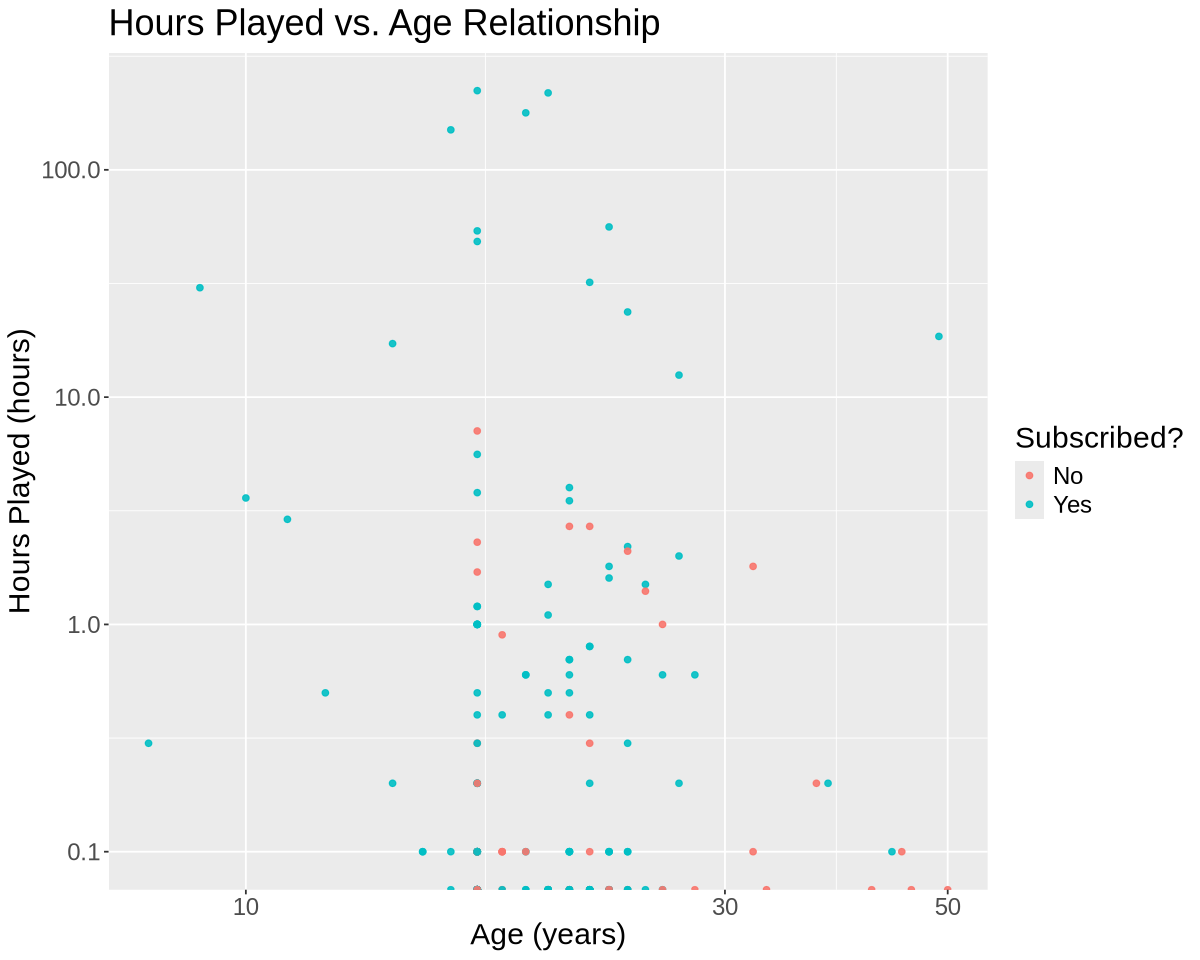

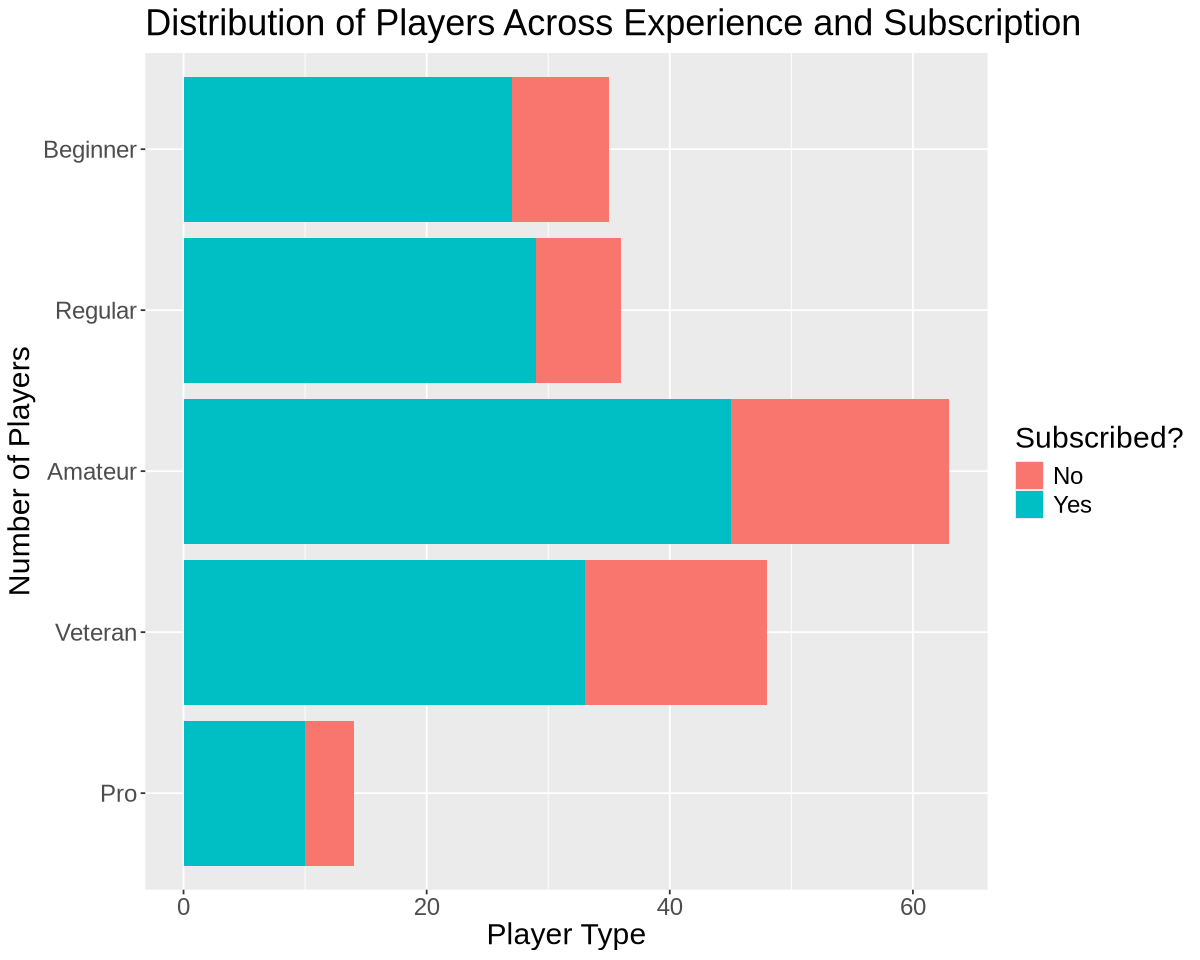

In [4]:
#General Visualization
options(repr.plot.width = 10, repr.plot.height = 8) 
tidy_player_age_plot <- tidy_player |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(alpha = 0.9) + 
	scale_x_log10() +
    scale_y_log10() +
    labs(x = "Age (years)", y = "Hours Played (hours)", color = "Subscribed?") +
    ggtitle("Hours Played vs. Age Relationship") +
    theme(text = element_text(size = 18))

tidy_players_experience_plot <- tidy_player |>
    ggplot(aes(y = experience, fill = subscribe)) +
    geom_bar(stat = "count") +
    labs(x = "Player Type", y = "Number of Players", fill = "Subscribed?") +
    ggtitle("Distribution of Players Across Experience and Subscription") +
    theme(text = element_text(size = 18))
tidy_player_age_plot
tidy_players_experience_plot

In [5]:
# For tuning
set.seed(4923)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

In [6]:
#Filter for each player type and split between training and testing sets
# set.seed(4923)
# beginner_players <- tidy_player |> filter(experience == "Beginner")
# beginner_split <- initial_split(beginner_players, prop = 0.75, strata = subscribe)
# beginner_train <- training(beginner_split)
# beginner_test <- testing(beginner_split)

# regular_players <- tidy_player |> filter(experience == "Regular")
# regular_split <- initial_split(regular_players, prop = 0.75, strata = subscribe)
# regular_train <- training(regular_split)
# regular_test <- testing(regular_split)

# amateur_players <- tidy_player |> filter(experience == "Amateur")
# amateur_split <- initial_split(amateur_players, prop = 0.75, strata = subscribe)
# amateur_train <- training(amateur_split)
# amateur_test <- testing(amateur_split)

# veteran_players <- tidy_player |> filter(experience == "Veteran")
# veteran_split <- initial_split(veteran_players, prop = 0.75, strata = subscribe)
# veteran_train <- training(veteran_split)
# veteran_test <- testing(veteran_split)

# pro_players <- tidy_player |> filter(experience == "Pro")
# pro_split <- initial_split(pro_players, prop = 0.75, strata = subscribe)
# pro_train <- training(pro_split)
# pro_test <- testing(pro_split)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7777778


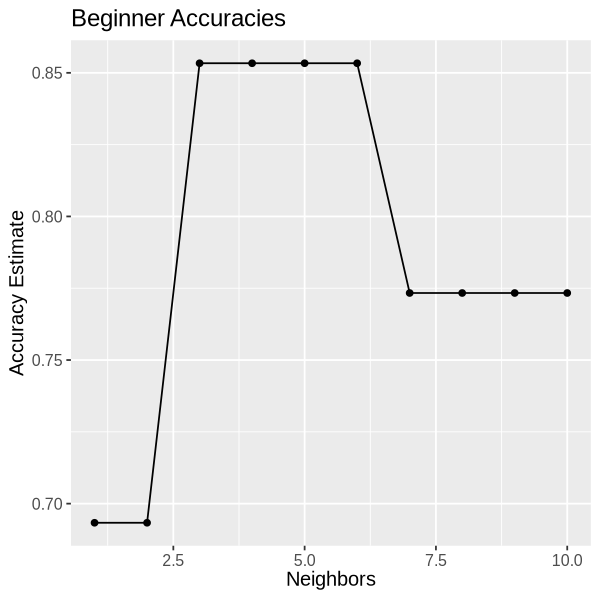

In [7]:
#Beginner
options(repr.plot.width = 5, repr.plot.height = 5)
set.seed(4923)

k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

beginner_players <- tidy_player |> filter(experience == "Beginner")

beginner_split <- initial_split(beginner_players, prop = 0.75, strata = subscribe)
beginner_train <- training(beginner_split)
beginner_test <- testing(beginner_split)

beginner_vfold <- vfold_cv(beginner_train, v = 5, strata = subscribe)

beginner_recipe <- recipe(subscribe ~ played_hours + Age, data = beginner_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

beginner_fit <- workflow() |>
  add_recipe(beginner_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = beginner_vfold, grid = k_vals)

beginner_accuracies <- beginner_fit |> collect_metrics() |>
  filter(.metric == "accuracy")

cross_val_plot <- ggplot(beginner_accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate", title = "Beginner Accuracies") +
    theme(text = element_text(size = 12))
cross_val_plot

beginner_mnist_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
    set_engine("kknn") |>
    set_mode("classification")

beginner_mnist_fit <- fit(beginner_mnist_spec, subscribe ~ played_hours + Age, data = beginner_train)

beginner_mnist_predictions <- predict(beginner_mnist_fit, beginner_test) |> bind_cols(beginner_test)

beginner_mnist_metrics <- beginner_mnist_predictions |> 
    metrics(truth = subscribe, estimate = .pred_class) |> 
    filter(.metric == "accuracy")

beginner_mnist_metrics

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 4 rows.
               ✖ Assigned data has 5 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 5 to size 4.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8


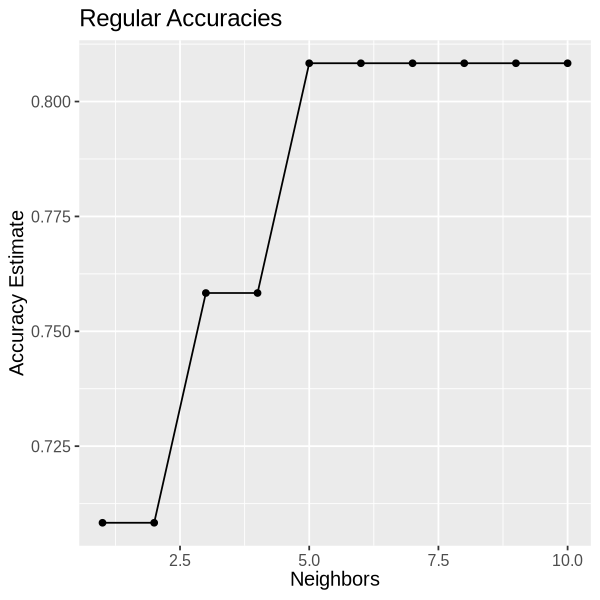

In [8]:
#Regular
options(repr.plot.width = 5, repr.plot.height = 5)
set.seed(4923)

k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

regular_players <- tidy_player |> filter(experience == "Regular")

regular_split <- initial_split(regular_players, prop = 0.75, strata = subscribe)
regular_train <- training(regular_split)
regular_test <- testing(regular_split)

regular_vfold <- vfold_cv(regular_train, v = 5, strata = subscribe)

regular_recipe <- recipe(subscribe ~ played_hours + Age, data = regular_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

regular_fit <- workflow() |>
  add_recipe(regular_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = regular_vfold, grid = k_vals)

regular_accuracies <- regular_fit |> collect_metrics() |>
  filter(.metric == "accuracy")

cross_val_plot <- ggplot(regular_accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate", title = "Regular Accuracies") +
    theme(text = element_text(size = 12))
cross_val_plot

regular_mnist_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 6) |>
    set_engine("kknn") |>
    set_mode("classification")

regular_mnist_fit <- fit(regular_mnist_spec, subscribe ~ played_hours + Age, data = regular_train)

regular_mnist_predictions <- predict(regular_mnist_fit, regular_test) |> bind_cols(regular_test)

regular_mnist_metrics <- regular_mnist_predictions |> 
    metrics(truth = subscribe, estimate = .pred_class) |> 
    filter(.metric == "accuracy")

regular_mnist_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7058824


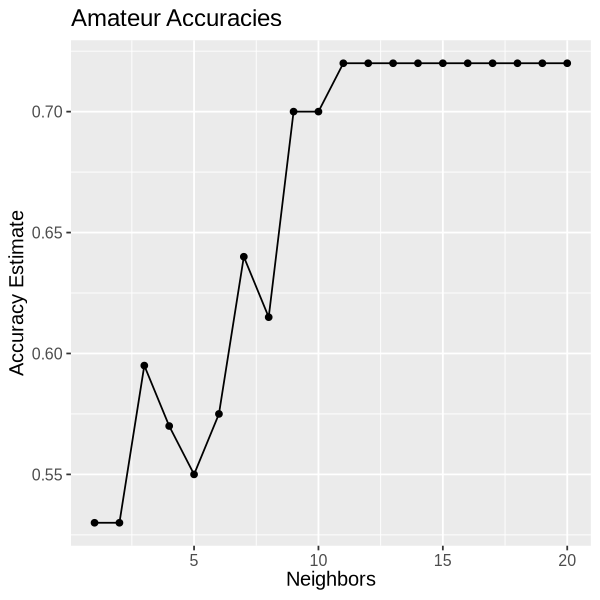

In [9]:
#Amateur
options(repr.plot.width = 5, repr.plot.height = 5)
set.seed(4923)

k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

amateur_players <- tidy_player |> filter(experience == "Amateur")

amateur_split <- initial_split(amateur_players, prop = 0.75, strata = subscribe)
amateur_train <- training(amateur_split)
amateur_test <- testing(amateur_split)

amateur_vfold <- vfold_cv(amateur_train, v = 5, strata = subscribe)

amateur_recipe <- recipe(subscribe ~ played_hours + Age, data = amateur_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

amateur_fit <- workflow() |>
  add_recipe(amateur_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = amateur_vfold, grid = k_vals)

amateur_accuracies <- amateur_fit |> collect_metrics() |>
  filter(.metric == "accuracy")

cross_val_plot <- ggplot(amateur_accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate", title = "Amateur Accuracies") +
    theme(text = element_text(size = 12))
cross_val_plot

amateur_mnist_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 18) |>
    set_engine("kknn") |>
    set_mode("classification")

amateur_mnist_fit <- fit(amateur_mnist_spec, subscribe ~ played_hours + Age, data = amateur_train)

amateur_mnist_predictions <- predict(amateur_mnist_fit, amateur_test) |> bind_cols(amateur_test)

amateur_mnist_metrics <- amateur_mnist_predictions |> 
    metrics(truth = subscribe, estimate = .pred_class) |> 
    filter(.metric == "accuracy")

amateur_mnist_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6923077


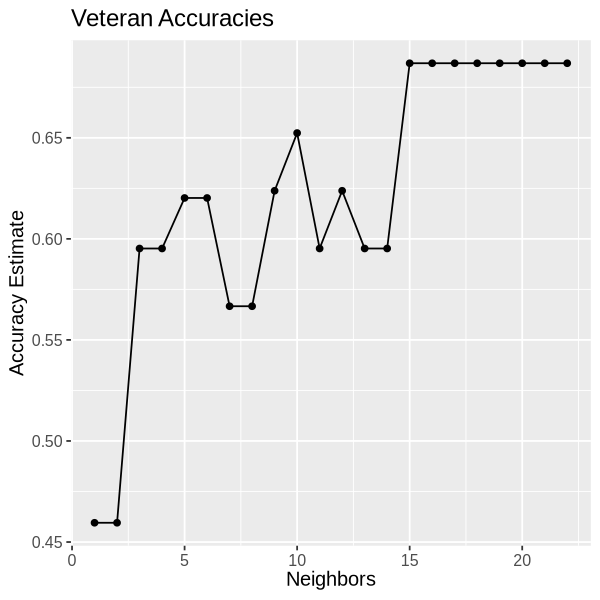

In [10]:
#Vetern
options(repr.plot.width = 5, repr.plot.height = 5)
set.seed(4923)

k_vals <- tibble(neighbors = seq(from = 1, to = 22, by = 1))

veteran_players <- tidy_player |> filter(experience == "Veteran")

veteran_split <- initial_split(veteran_players, prop = 0.75, strata = subscribe)
veteran_train <- training(veteran_split)
veteran_test <- testing(veteran_split)

veteran_vfold <- vfold_cv(veteran_train, v = 5, strata = subscribe)

veteran_recipe <- recipe(subscribe ~ played_hours + Age, data = veteran_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

veteran_fit <- workflow() |>
  add_recipe(veteran_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = veteran_vfold, grid = k_vals)

veteran_accuracies <- veteran_fit |> collect_metrics() |>
  filter(.metric == "accuracy")

cross_val_plot <- ggplot(veteran_accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate", title = "Veteran Accuracies") +
    theme(text = element_text(size = 12))
cross_val_plot

veteran_mnist_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 20) |>
    set_engine("kknn") |>
    set_mode("classification")

veteran_mnist_fit <- fit(veteran_mnist_spec, subscribe ~ played_hours + Age, data = veteran_train)

veteran_mnist_predictions <- predict(veteran_mnist_fit, veteran_test) |> bind_cols(veteran_test)

veteran_mnist_metrics <- veteran_mnist_predictions |> 
    metrics(truth = subscribe, estimate = .pred_class) |> 
    filter(.metric == "accuracy")

veteran_mnist_metrics

→ A | warning: 6 samples were requested but there were 7 rows in the data. 2 will be used.

There were issues with some computations   A: x1

→ B | warning: 6 samples were requested but there were 8 rows in the data. 3 will be used.

There were issues with some computations   A: x1
→ C | warning: 6 samples were requested but there were 9 rows in the data. 4 will be used.

There were issues with some computations   A: x1
→ D | warning: No event observations were detected in `truth` with event level 'No'.

There were issues with some computations   A: x1
→ E | error:   incorrect number of dimensions

There were issues with some computations   A: x1
There were issues with some computations   A: x2   B: x1   C: x2   D: x1   E: x1





.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0


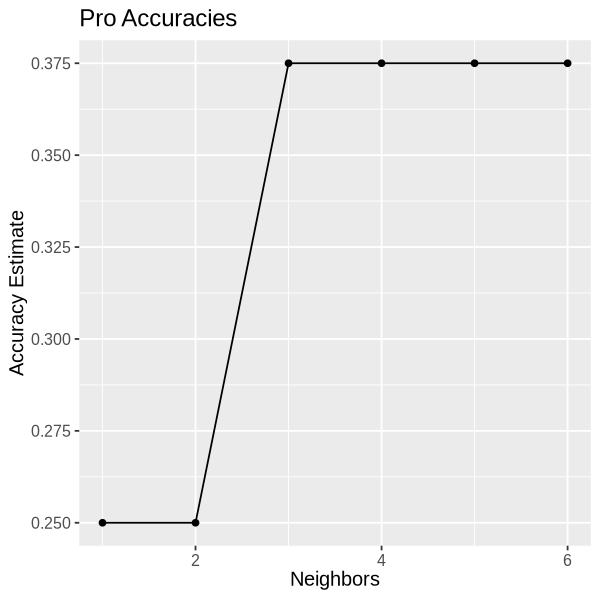

In [11]:
#Pro
options(repr.plot.width = 5, repr.plot.height = 5)
set.seed(4923)

k_vals <- tibble(neighbors = seq(from = 1, to = 6, by = 1))

pro_players <- tidy_player |> filter(experience == "Pro")

pro_split <- initial_split(pro_players, prop = 0.75, strata = subscribe)
pro_train <- training(pro_split)
pro_test <- testing(pro_split)

pro_vfold <- vfold_cv(pro_train, v = 5, strata = subscribe)

pro_recipe <- recipe(subscribe ~ played_hours + Age, data = pro_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

pro_fit <- workflow() |>
  add_recipe(pro_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = pro_vfold, grid = k_vals)

pro_accuracies <- pro_fit |> collect_metrics() |>
  filter(.metric == "accuracy")

cross_val_plot <- ggplot(pro_accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate", title = "Pro Accuracies") +
    theme(text = element_text(size = 12))
cross_val_plot

pro_mnist_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
    set_engine("kknn") |>
    set_mode("classification")

pro_mnist_fit <- fit(pro_mnist_spec, subscribe ~ played_hours + Age, data = pro_train)

pro_mnist_predictions <- predict(pro_mnist_fit, pro_test) |> bind_cols(pro_test)

pro_mnist_metrics <- pro_mnist_predictions |> 
    metrics(truth = subscribe, estimate = .pred_class) |> 
    filter(.metric == "accuracy")

pro_mnist_metrics

## Discussion

- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

## References
- You may include references if necessary, as long as they all have a consistent citation style.